In [1]:
import MieScattering_librairy as ms
import numpy as np
import matplotlib.pyplot as plt

### Definition of the 9 particles

In [5]:
wavelength = 532

radius1 = np.linspace(0.1e3,2e3,100)
radius2 = np.linspace(5e3,10e3,100)
radius3 = np.linspace(15e3,20e3,100)
radius = [radius1,radius2,radius3]

real_d = [1e3,7.5e3,17e3]

index1 = 1.33
index2 = 1.5
index3 = 1.8
index = [index1,index2,index3]

angular_domain1 = [0.9,6.7]
angular_domain2 = [10,90]
angular_domain3 = [175,180]
angular_domain = [angular_domain1,angular_domain2,angular_domain3]

spectral_domain = [400,800]

theta_list = [4,20,178,180]


sigma = [0.3,0.6]

### NNLS method validation
#### Angular domains

In [5]:
## NNLS method
error_norm = []
residual = []
error_relativ = []
H = []
g = []
for k in range(3):
    domain = angular_domain[k]
    for i in range(3):
        size = radius[i]
        d = real_d[i]
        for j in range(3):
            refra = index[j]
            #H.append(ms.kernel_ang(refra,wavelength,size,0.5,angular_domain1))
            #g.append(ms.measure_ang(refra,wavelength,d,0.5,angular_domain1))
            sol,res,err,point = ms.PSD_angular(refra,wavelength,d,size,0.5,domain,False)
            error_norm.append(err)
            residual.append(res)
            error_relativ.append(err/d)
            #print(np.linalg.norm(H[-1]@sol-g[-1]))

In [6]:
print(error_relativ)
np.savetxt("NNLS_relativ.txt",error_relativ)
#np.savetxt("NNLS_error.txt",error_norm)
#np.savetxt("NNLS_residual.txt",residual)

[0.002020202020201964, 0.002020202020201964, 0.002020202020201964, 0.003367003367003296, 0.01010101010101013, -0.003367003367003296, -0.001782531194295991, -0.001782531194295991, 0.0011883541295306607, 0.002020202020201964, 0.002020202020201964, 0.002020202020201964, -0.003367003367003296, 0.003367003367003296, -0.003367003367003296, 0.0011883541295306607, 0.0011883541295306607, 0.0011883541295306607, 0.002020202020201964, 0.002020202020201964, 0.002020202020201964, 0.016835016835016845, -0.016835016835016845, -0.016835016835016845, 0.013071895424836624, -0.001782531194295991, 0.01604278074866306]


#### Spectral domains

In [3]:
error = []
residual = [] 
err_relativ = []
for k in range(len(theta_list)): 
    theta = theta_list[k]
    for i in range(3):
        size = radius[i]
        d = real_d[i]
        for j in range(3):
            refra = index[j]
            sol,res,err,point = ms.PSD_spectral(refra,theta,d,size,50,False)
            error.append(err)
            residual.append(res)
            err_relativ.append(err/d)

In [4]:
print(err_relativ)
np.savetxt("NNLS_relativ_sp.txt",err_relativ)
#np.savetxt("NNLS_error_sp.txt",error)
#np.savetxt("NNLS_residual_sp.txt",residual)

[0.002020202020201964, 0.002020202020201964, 0.002020202020201964, -0.003367003367003296, 0.25252525252525254, 0.21885521885521886, 0.0011883541295306607, -0.07308377896613188, 0.0011883541295306607, 0.002020202020201964, 0.002020202020201964, 0.002020202020201964, 0.003367003367003296, -0.003367003367003296, -0.003367003367003296, 0.0011883541295306607, 0.0011883541295306607, 0.0011883541295306607, 0.002020202020201964, 0.002020202020201964, 0.002020202020201964, -0.25252525252525254, -0.3131313131313131, 0.003367003367003296, 0.0011883541295306607, -0.0047534165181224285, 0.0011883541295306607, 0.002020202020201964, 0.002020202020201964, 0.002020202020201964, -0.003367003367003296, 0.17845117845117833, 0.003367003367003296, 0.0011883541295306607, 0.08437314319667262, 0.13784907902554958]


### Fourier method validation

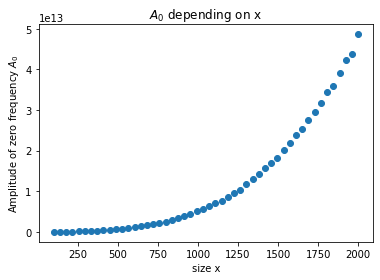

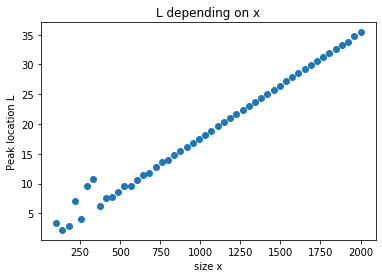

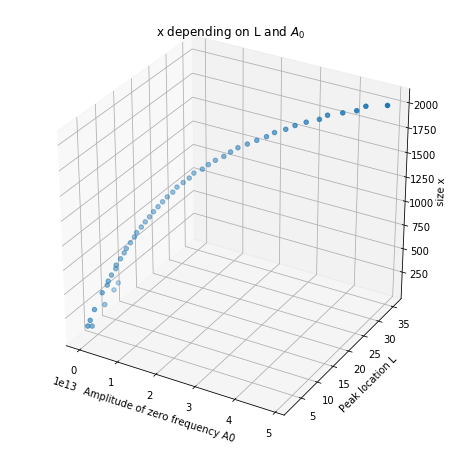

[[58.08397028]]
The experimental size x: [[1027.94655313]]
The real size x: 1000.0
Error: [[27.94655313]]


In [3]:
#### graphs for article
domain = angular_domain[0]
size = radius[0]
d = real_d[0]
m = index[1]
x_exp,x_error,x_error_relat = ms.fourier_inversion(size,d,m,wavelength,'SU',domain)

In [11]:
X = []
Xerr = []
Xerr_relat = []

domain = angular_domain[0]
size = radius[1]
d = real_d[1]
for j in range(3):
    refra = index[j]
    x_exp,x_error,x_error_relat = ms.fourier_inversion(size,d,refra,wavelength,'SL',domain)
    X.append(x_exp)
    Xerr.append(x_error)
    Xerr_relat.append(x_error_relat)

KeyboardInterrupt: 

In [ ]:
np.savetxt("Spec_err.txt",Xerr)
np.savetxt("Spec_value.txt",X)
np.savetxt("Spec_err_relat.txt",Xerr_relat)

### Bertero Validation
#### Spectral method

In [9]:
#(radius[0],np.linspace(spectral_domain[0],spectral_domain[1],100),sigma[0],index[0],theta_delta)
error = []
error_relat = []
for q in range(len(theta_list)):
    theta_delta = np.linspace(theta_list[q]-0.01,theta_list[q]+0.01,3)
    for i in range(3):
        d = radius[i]
        for j in range(3): 
            m = index[j]
            distrib_exp = ms.retrieve_distrib(d, np.linspace(spectral_domain[0],spectral_domain[1],100), sigma[0], m, theta_delta, np.exp(-45))
            Norm = ms.lognormal(d, sigma[0])
            n_exp = np.argmax(distrib_exp)
            n_th = np.argmax(Norm)
            #print(d[n_exp],d[n_th])
            error.append(np.linalg.norm(d[n_exp]-d[n_th]))
            #print(error[-1])
            error_relat.append(np.linalg.norm(d[n_exp]-d[n_th])/(d[n_th])*100)
            #print(error_relat[-1])


In [10]:
np.savetxt("SVD_err.txt",error)
np.savetxt("SVD_err_relat.txt",error_relat)

#### Angular method

In [14]:
#(radius[0],np.linspace(spectral_domain[0],spectral_domain[1],100),sigma[0],index[0],theta_delta)
error = []
error_relat = []
for q in range(3):
    domain = angular_domain[q]
    theta = np.linspace(domain[0],domain[1],100)
    for i in range(3):
        d = radius[i]
        for j in range(3): 
            m = index[j]
            distrib_exp = ms.retrieve_distrib_theta(d, np.linspace(wavelength-0.05,wavelength+0.05,3), sigma[0], m ,theta, np.exp(-45))
            Norm = ms.lognormal(d, sigma[0])
            n_exp=np.argmax(distrib_exp)
            n_th=np.argmax(Norm)
            error.append(np.linalg.norm(d[n_exp]-d[n_th]))
            error_relat.append(np.linalg.norm(d[n_exp]-d[n_th])/(d[n_th])*100)


In [15]:
np.savetxt("SVD_err_ang.txt",error)
np.savetxt("SVD_err_relat_ang.txt",error_relat)